In [12]:
import pandas as pd

In [3]:
def instantiate_tokenizer(model_name = IM_MODEL_NAME):
    """
    Define the tokenizer we want to use in our modelling.
    """

    tokenizer = DistilBertTokenizer.from_pretrained(model_name)

    return tokenizer

In [15]:
!pwd

/home/connor/code/zulu-tango/news_and_echo_bubbles/notebooks


In [ ]:
/home/connor/code/zulu-tango/news_and_echo_bubbles/

In [16]:
df = pd.read_csv('/home/connor/code/zulu-tango/news_and_echo_bubbles/raw_data/cleaned.csv', index_col=0)

In [17]:
df.head()

,link,pdate,title,author,text,keywords,tags,compound,neg,neu,pos,polarity,subjectivity,classifier,time,urls,pre_process_text
0,https://www.alternet.org/2021/03/dan-crenshaw/,2021-03-22,Republican Dan Crenshaw goes down in flames du...,"['Sarah K. Burris', 'Raw Story']",MSNBC host Mehdi Hasan went after Rep. Dan Cre...,"['come', 'didnt', 'going', 'fox', 'biden', 'cr...",{'Religious right'},0.6474,0.055,0.876,0.069,-0.034989,0.411162,0,10:17:36+00:00,www.alternet.org,msnbc host mehdi hasan went after rep dan cre...
1,https://www.alternet.org/2021/03/rep-dan-crens...,2021-03-09,Rep. Dan Crenshaw purchased stock during pande...,['Meaghan Ellis'],Rep. Dan Crenshaw's (R-Texas) stock purchase h...,"['purchased', 'transactions', 'law', 'pandemic...",{'Religious right'},-0.8949,0.082,0.860,0.058,0.011441,0.323766,0,13:32:36+00:00,www.alternet.org,rep dan crenshaw s r texas stock purchase h...
2,https://www.alternet.org/2020/11/dan-crenshaw/,2020-11-23,Sen. Ed Markey applauded for silent dismissal ...,"['Walter Einenkel', 'Daily Kos']",Sen. Ed Markey is the Massachusetts Democrat w...,"['district', 'lame', 'markey', 'office', 'rep'...",{'Religious right'},0.9289,0.071,0.811,0.118,0.081250,0.439912,0,12:14:56+00:00,www.alternet.org,sen ed markey is the massachusetts democrat w...
3,https://www.alternet.org/2021/03/texas-storm-2...,2021-03-21,Paperwork failures worsened Texas blackouts — ...,"['Erin Douglas', 'The Texas Tribune']","On Valentine's Day, the major utility that sup...","['failures', 'scramble', 'energy', 'midstorm',...",{'Religious right'},0.9890,0.047,0.884,0.069,0.029100,0.447278,0,16:59:37+00:00,www.alternet.org,on valentine s day the major utility that sup...
4,https://www.texastribune.org/2021/03/18/texas-...,2021-03-18,"Paperwork failures worsened Texas blackouts, s...","['Erin Douglas', 'March', 'Pm Central', 'Updat...","On Valentine’s Day, the major utility that sup...","['failures', 'scramble', 'energy', 'midstorm',...",set(),0.9903,0.045,0.885,0.070,0.029100,0.447278,0,00:00:00,www.texastribune.org,on valentine’s day the major utility that sup...


In [1]:
!pip install tensorflow transformers

In [19]:
import tensorflow as tf
from tensorflow.keras import optimizers, losses
from transformers import DistilBertTokenizer, TFDistilBertForSequenceClassification
from tensorflow.keras.callbacks import EarlyStopping

2023-12-01 12:30:07.335328: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-12-01 12:30:07.341512: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-01 12:30:07.552985: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-01 12:30:07.553021: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-01 12:30:07.566118: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to

In [3]:
BATCH_SIZE = 2
LEARNING_RATE = 3e-5
TOKEN_MAX_LEN = 50   ### currently set at 50 to speed up basic model training
TEST_SPLIT = 0.2
VALIDATION_SPLIT = 0.3   ### refers to split withing training data (not whole dataset)
EPOCHS = 5   ### currently set to 5 to speed up basic model training
PATIENCE = 2   ### currently set to 2 due to the low number of epochs (5)

In [10]:
def get_X_and_y(df):
    """
    Gets from our dataset: (i) the feature (i.e. X - the pre-processed text);
    and (ii) the target (i.e. y - the ideology: left wing = 0 / right wing = 1).
    These need to be converted into lists for use in our model.
    """

    X = df["pre_process_text"].tolist()
    y = df["classifier"].tolist()

    return X, y

In [11]:
X, y = get_X_and_y(df)

In [12]:
tokenizer = DistilBertTokenizer.from_pretrained("distilbert-base-uncased")

tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

In [13]:
def text_tokenizer(X,
                   tokenizer,
                   max_len = TOKEN_MAX_LEN,
                   truncation = True,
                   padding = "max_length"):
    """
    Returns a dictionary of tokenized text with 2 keys: "input_ids" and "attention_mask".
    These 2 keys are required for the input into the DistilBert model.
    """

    tokens = tokenizer(X, max_length = max_len, truncation = truncation, padding = padding)

    return tokens

In [14]:
tokens = text_tokenizer(X, tokenizer)

In [15]:
def tf_dataset_constructor(tokens,
                           y):
    """
    Using the tokenized input from the text_tokenizer function,
    returns TensorFlow objects for use in the DistilBert model.
    """

    tfdataset = tf.data.Dataset.from_tensor_slices((dict(tokens),y))

    return tfdataset

In [16]:
tfdataset = tf_dataset_constructor(tokens, y)

In [17]:
def train_test_split(X,
                     tfdataset,
                     test_split = TEST_SPLIT,
                     val_split = VALIDATION_SPLIT,
                     batch_size = BATCH_SIZE):
    """
    This function splits the TensorFlow object created in the tf_dataset_constructor function
    into train, valdiation and test sets.
    """

    # get the sizes of the train and validation sets
    train_size = int(len(X) * (1-test_split))
    val_size = int(train_size * val_split)

    # shuffle the full dataset
    tfdataset = tfdataset.shuffle(len(X))

    # from the full datset, get out the train, validation and test sets
    tfdataset_train = tfdataset.take(train_size)
    tfdataset_val = tfdataset.skip(train_size - val_size).take(val_size)
    tfdataset_test = tfdataset.skip(train_size)

    # batch the train, validation and test sets
    tfdataset_train = tfdataset_train.batch(batch_size)
    tfdataset_val = tfdataset_val.batch(batch_size)
    tfdataset_test = tfdataset_test.batch(batch_size)

    return tfdataset_train, tfdataset_val, tfdataset_test

In [18]:
tfdataset_train, tfdataset_val, tfdataset_test = train_test_split(X, tfdataset)

In [19]:
def ideology_model(tfdataset_train,
                   tfdataset_val,
                   model_name = "distilbert-base-uncased",
                   learning_rate = LEARNING_RATE,
                   batch_size = BATCH_SIZE,
                   epochs = EPOCHS,
                   patience = PATIENCE):

    """
    Set up an run a DistilBert model on our TensorFlow training dataset.
    """

    # set up model
    model = TFDistilBertForSequenceClassification.from_pretrained(model_name)

    # define loss function
    loss = losses.SparseCategoricalCrossentropy(from_logits=True)

    # define optimizer to be used to minimise loss
    optimizer = optimizers.Adam(learning_rate)

    # compile model
    model.compile(optimizer = optimizer,
                  loss = loss,
                  metrics = "accuracy")

    # fit model
    model.fit(tfdataset_train,
              batch_size = batch_size,
              epochs = epochs,
              validation_data = tfdataset_val,
              callbacks = EarlyStopping(patience = PATIENCE, restore_best_weights = True))

    return model

In [20]:
model = ideology_model(tfdataset_train, tfdataset_val)

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFDistilBertForSequenceClassification: ['vocab_layer_norm.bias', 'vocab_projector.bias', 'vocab_layer_norm.weight', 'vocab_transform.bias', 'vocab_transform.weight']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFDistilBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['pre_classifier.weight', 'pre_classifier.bias', 'classifier.weight', 'classifier.bias']
You should 

Epoch 1/5
1076/1076 [==============================] - 84s 56ms/step - loss: 0.5744 - accuracy: 0.6752 - val_loss: 0.3780 - val_accuracy: 0.8419
Epoch 2/5
1076/1076 [==============================] - 55s 51ms/step - loss: 0.3986 - accuracy: 0.8230 - val_loss: 0.2361 - val_accuracy: 0.9147
Epoch 3/5
1076/1076 [==============================] - 54s 50ms/step - loss: 0.2487 - accuracy: 0.9038 - val_loss: 0.1200 - val_accuracy: 0.9705
Epoch 4/5
1076/1076 [==============================] - 59s 54ms/step - loss: 0.1465 - accuracy: 0.9503 - val_loss: 0.0564 - val_accuracy: 0.9829
Epoch 5/5
1076/1076 [==============================] - 54s 50ms/step - loss: 0.0838 - accuracy: 0.9717 - val_loss: 0.0486 - val_accuracy: 0.9798


In [21]:
def ideology_model_evaluator(model,
                             tfdataset_test,
                             batch_size = BATCH_SIZE):
    """
    Evaluate our model on the TensorFlow test dataset
    """

    benchmarks = model.evaluate(tfdataset_test, batch_size = batch_size, return_dict = True)
    accuracy = benchmarks["accuracy"]

    return accuracy

In [22]:
accuracy = ideology_model_evaluator(model, tfdataset_test)

270/270 [==============================] - 6s 22ms/step - loss: 0.0302 - accuracy: 0.9907


In [23]:
def ideology_model_predictor(model,
                             tokens):
    """
    This function uses the model output from the ideology_model function to output the
    probabilities of each individual article being left or right wing (0 = left wing,
    1 = right wing). As the model spits out log odds rather than probabilities, these
    also need to be converted in this function into probabilities.
    """

    # firstly create a TensorFlow version of our tokenized dataset without our y
    tfdataset_no_y = tf.data.Dataset.from_tensor_slices(dict(tokens))

    # use this to get out the logits for our model
    pred_logits = model.predict(tfdataset_no_y)[0]

    # convert these into probabilties
    pred_probas = tf.nn.softmax(pred_logits).numpy()

    return pred_probas

In [24]:
pred_probas = ideology_model_predictor(model, tokens)

2691/2691 [==============================] - 16s 6ms/step


In [34]:
import matplotlib.pyplot as plt

(array([1.330e+03, 9.500e+01, 4.600e+01, 3.100e+01, 2.000e+01, 1.100e+01,
        9.000e+00, 1.200e+01, 6.000e+00, 7.000e+00, 4.000e+00, 6.000e+00,
        0.000e+00, 4.000e+00, 4.000e+00, 3.000e+00, 2.000e+00, 1.000e+00,
        1.000e+00, 4.000e+00, 1.000e+00, 2.000e+00, 1.000e+00, 1.000e+00,
        1.000e+00, 1.000e+00, 0.000e+00, 1.000e+00, 3.000e+00, 2.000e+00,
        1.000e+00, 0.000e+00, 2.000e+00, 1.000e+00, 2.000e+00, 4.000e+00,
        3.000e+00, 2.000e+00, 2.000e+00, 3.000e+00, 1.000e+00, 1.000e+00,
        2.000e+00, 4.000e+00, 2.000e+00, 5.000e+00, 5.000e+00, 1.100e+01,
        2.800e+01, 1.003e+03]),
 array([5.37680055e-04, 2.04856955e-02, 4.04337123e-02, 6.03817254e-02,
        8.03297386e-02, 1.00277759e-01, 1.20225772e-01, 1.40173793e-01,
        1.60121799e-01, 1.80069819e-01, 2.00017840e-01, 2.19965845e-01,
        2.39913866e-01, 2.59861887e-01, 2.79809892e-01, 2.99757898e-01,
        3.19705933e-01, 3.39653939e-01, 3.59601945e-01, 3.79549980e-01,
        3.994979

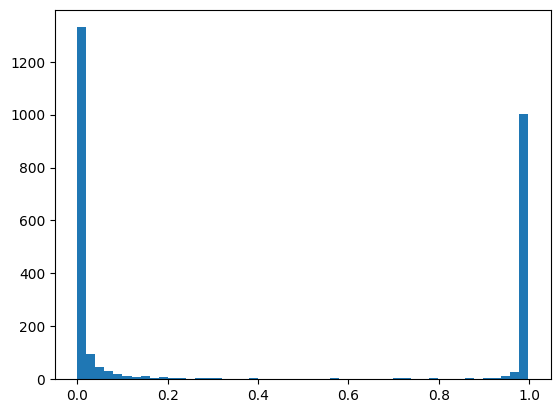

In [37]:
plt.hist(pred_probas[:,1], bins = 50)

In [ ]:
#### FINAL STEPS:
## Add pred_probas back into to the preprocessed dataset as new columns
## (technically only need to add one of these columns, as each pair of probs adds up to 1)
## The we can use these probabilities to define whether an article is very left / left / centre / right / centre-right
## e.g. based on the left-hand probability only (i.e. the probability it is left-wing):
## 0 - 0.2 = very right, 0.2 - 0.4 = right, 0.4 - 0.6 = centre, 0.6 - 0.8 = left, 0.8 - 1 = very left
## This can then be used with the output of Zoe's keyword search to identify a sorted list of
## articles from left to right which contain Zoe's keywords
## These articles then also need to be summarised

In [38]:
df_new = pd.read_csv('/content/drive/MyDrive/scraped_data_UK_wed.csv')
df_new.head()

,Unnamed: 0,link,pdate,title,author,text,keywords,tags,compound,neg,neu,pos,polarity,subjectivity
0,0,https://www.theguardian.com/artanddesign/galle...,2023-11-28 00:00:00,Village people: a 1970s fishing community – in...,[],"Yvon and Yvette, 1973 ‘Yvon and Yvette are bro...","['yvette', 'yvon', 'pictures', 'triplets', '19...",set(),0.2023,0.000,0.979,0.021,0.072500,0.399167
1,1,https://www.theguardian.com/news/gallery/2023/...,2023-11-26 00:00:00,"Monkeys, musicians and marchers: photos of the...","['Jo Blason', 'Photograph', 'Vianney Thibaut N...","Madrid, Spain People take part in a march to m...","['day', 'mark', 'hidalgoepa', 'international',...",set(),-0.6249,0.163,0.837,0.000,0.000000,0.000000
2,2,https://www.theguardian.com/artanddesign/galle...,2023-11-24 00:00:00,The week around the world in 20 pictures,"['Jim Powell', 'Photograph', 'Mahmud Hams Afp ...","Dakar, Senegal Yellow-billed kites search for ...","['pictures', 'west', 'villages', 'wesselsafpge...",set(),0.5719,0.038,0.882,0.080,0.269872,0.546368
3,3,https://www.theguardian.com/artanddesign/galle...,2023-11-25 00:00:00,Striking smartphone portraits from Ghana – in ...,['Kathryn Bromwich'],"After graduating secondary school in 2019, Sar...","['pictures', 'colour', 'ghana', 'portraits', '...",set(),0.9648,0.000,0.828,0.172,0.064141,0.275421
4,4,https://www.theguardian.com/culture/gallery/20...,2023-11-24 00:00:00,Tales from the hood: LA’s street gang culture ...,['Sarah Gilbert'],Merrick Morton has been documenting gangs in L...,"['las', 'morton', 'pictures', 'west', 'stereot...",set(),-0.7184,0.120,0.880,0.000,-0.100000,0.750000


In [47]:
import random

In [54]:
new_texts = df_new["text"].astype(str)
new_texts = df_new["text"].tolist()

len(new_texts)
new_texts_sample_l = new_texts[0:50]
new_texts_sample_r = new_texts[2286:2307]

In [60]:
test_tokens = text_tokenizer(new_texts_sample_r, tokenizer)

In [61]:
test_output = ideology_model_predictor(model, test_tokens)

21/21 [==============================] - 0s 9ms/step


In [66]:
pd.set_option('display.max_colwidth', 1000)
pd.DataFrame(list(zip(new_texts_sample_r, test_output[:, 1])))

,0,1
0,"Olivia Colman looked smitten with her husband Ed Sinclair as the couple made a rare red carpet appearance together at the premiere for her new film Wonka on Tuesday.\n\nThe Oscar winning actress, 49, showed off her chic sense of style in a floor-length black gown for the evening at The Royal Festival Hall in London.\n\nHer elegant dress featured a sheer panel and cut out detail to the front, while lengths of material hung down from the shoulders and flowed to the ground.\n\nThe star sported a new platinum blonde hair colour as she struck some elegant poses in front of the Christmas trees on the red carpet.\n\nOlivia completed her look by wearing some delicate silver jewellery which dazzled under the bright lights.\n\nOlivia Colman looked smitten with her husband Ed Sinclair as the couple made a rare red carpet appearance together at the premiere for her new film Wonka on Tuesday\n\nThe Oscar winning actress, 49, showed off her chic sense of style in a floor-length black gown for th...",0.237387
1,"Advertisement\n\nMargot Robbie and her husband Tom Ackerley were every inch the real-life Barbie and Ken while walking arm-in-arm to a screening for her hit film, Barbie, in New York City on Tuesday night.\n\nAs the happy couple arrived to the Peninsula Hotel for the exclusive event, also attended by Dua Lipa, whose song Dance the Night was featured on the Barbie soundtrack, the Australian actress and producer, both 33, put on a loved-up display.\n\nAs they made their way into the five-star hotel in Midtown Manhattan, the two-time Oscar nominee held onto the crook of her man's arm as he confidently led them inside.\n\nThe bombshell, who became one of Hollywood's most sought-after leading ladies after appearing in Martin Scorsese's hit 2013 comedy The Wolf of Wall Street, looked beautiful in an all-pink Versace ensemble.\n\nHappy couple: Margot Robbie and her husband Tom Ackerley were every inch the real-life Barbie and Ken while walking arm-in-arm to a screening for her hit film, B...",0.002122
2,"Jennifer Lawrence cut a casual figure as she stepped in New York on Monday after she slammed speculation she has had plastic surgery on her face.\n\nThe actress, 33, wrapped up in a long black wool coat and a brown scarf as she headed out in the upper east side of city.\n\nJennifer layered the outerwear over a white sweatshirt and grey flared trousers and accessorised with a moss green handbag and tinted sunglasses.\n\nThe Hollywood star cut a low-key figure during her solo outing, which comes days after her interview with Kylie Jenner.\n\nJennifer hosted a Q&A with the make-up mogul, 26, in the latest edition of Interview Magazine and insisted the changes to her appearance was a result of cleverly applied make-up - not a cosmetic procedure.\n\nJennifer Lawrence cut a casual figure as she stepped in New York on Monday after slamming speculation she has had plastic surgery\n\nThe actress, 33, wrapped up in a long black wool coat and a brown scarf as she headed out in the Upper East ...",0.876154
3,"Hugh Grant and his wife Anna Elisabet Eberstein let up the red carpet on Tuesday evening at the Wonka world premiere at The Royal Festival Hall in London.\n\nThe iconic actor, 63, who plays an Oompa-Loompa in the movie, looked smart as he wore a black suit which he wore with a matching tie.\n\nHe donned a white shirt to complete his look and posed alongside his television producer wife Anna.\n\nAnna cut a glamorous figure in a white mini dress with a textured pattern and stood arm-in-arm with her famous husband on the red carpet.\n\nShe put on a very leggy display, adding a pair of tan heels to elongate her long legs.\n\nHugh Grant and his wife Anna Elisabet Eberstein let up the red carpet on Tuesday evening at the Wonka world premiere at The Royal Festival Hall in London\n\nThe iconic actor, 63, who plays an Oompa-Loompa in the movie, looked smart as he wore a black suit which he wore with a matching tie\n\nThe couple, who share three chi

(array([5., 0., 3., 2., 2., 0., 0., 0., 3., 6.]),
 array([0.00191211, 0.10134082, 0.20076953, 0.30019823, 0.39962694,
        0.49905565, 0.59848434, 0.69791305, 0.79734176, 0.89677048,
        0.99619919]),
 <BarContainer object of 10 artists>)

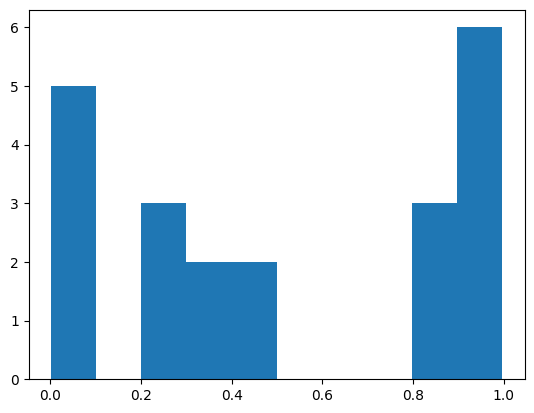

In [63]:
plt.hist(test_output[:,1])

In [25]:
df_new = df.sample(50)

In [26]:
df_new.head()

,link,pdate,title,author,text,keywords,tags,compound,neg,neu,pos,polarity,subjectivity,classifier,time,urls,pre_process_text
1566,https://theintercept.com/2021/03/17/biden-immi...,2021-03-19,Bernie Backs Covid Nurses Who Are Prepared to ...,"['John Nichols', 'Today Am', 'March', 'Alexand...",Subscribe to The Nation Subscribe now for as l...,"['work', 'pandemic', 'backs', 'hospital', 'ber...",set(),0.9989,0.079,0.768,0.152,0.148617,0.475907,0,14:00:23+00:00,theintercept.com,subscribe to the nation subscribe now for as l...
2274,https://obamawhitehouse.archives.gov/blog/2011...,2020-12-26,"If Biden wants to heal the nation, he should m...",['December'],Joe Biden says he wants to “heal America” as p...,"['congress', 'office', 'president', 'process',...","{'democrats', 'presidency', 'Opinion', 'joe bi...",-0.9907,0.109,0.839,0.053,0.019162,0.409968,1,00:00:00,obamawhitehouse.archives.gov,joe biden says he wants to “heal america” as p...
1132,https://www.motherjones.com/environment/2021/0...,2021-01-05,A Legendary Music Club Faces Permanent Closure...,"['Daniel King', 'Jacob Rosenberg', 'Ian Gordon...",Let our journalists help you make sense of the...,"['clubs', 'venue', 'lockdown', 'crowdfunding',...",set(),0.9493,0.000,0.920,0.080,0.074518,0.271625,0,14:12:56,www.motherjones.com,let our journalists help you make sense of the...
2477,https://www.newsmax.com/world/globaltalk/polan...,2021-03-17,Healthy Living Cuts Your Odds for 2 Leading Ki...,[],The same lifestyle habits that protect the hea...,"['killers', 'smoking', 'lau', 'risk', 'study',...","{'Autism', 'Allergies', 'Arthritis', 'Thyroid ...",-0.9969,0.163,0.756,0.080,0.161783,0.454984,1,00:00:00,www.newsmax.com,the same lifestyle habits that protect the hea...
1063,https://www.newyorker.com/magazine/2019/04/01/...,2020-12-22,A Powerful Lobbying Group Pushes to Keep Resta...,"['Kara Voght', 'Rebecca Leber', 'Tom Philpott'...",As the winter’s deadly coronavirus surge desce...,"['served', 'powerful', 'virus', 'health', 'lob...","{'Coronavirus', 'Congress'}",-0.9645,0.080,0.850,0.070,0.043356,0.401062,0,14:12:29,www.newyorker.com,as the winter’s deadly coronavirus surge desce...


In [1]:
IM_MODEL_NAME = "distilbert-base-uncased"
IM_BATCH_SIZE = 2
IM_LEARNING_RATE = 3e-5
IM_TOKEN_MAX_LEN = 50   ### currently set at 50 to speed up basic model training
IM_TEST_SPLIT = 0.2
IM_VALIDATION_SPLIT = 0.3   ### refers to split withing training data (not whole dataset)
IM_EPOCHS = 5   ### currently set to 5 to speed up basic model training
IM_PATIENCE = 2   ### currently set to 2 due to the low number of epochs (5)

In [29]:
type(IM_TEST_SPLIT)

float

In [2]:
def get_X_and_y(df):
    """
    Gets from our dataset: (i) the feature (i.e. X - the pre-processed text);
    and (ii) the target (i.e. y - the ideology: left wing = 0 / right wing = 1).
    These need to be converted into lists for use in our model.
    """

    X = df["pre_process_text"].tolist()
    y = df["classifier"].tolist()

    return X, y

In [3]:
def instantiate_tokenizer(model_name = IM_MODEL_NAME):
    """
    Define the tokenizer we want to use in our modelling.
    """

    tokenizer = DistilBertTokenizer.from_pretrained(model_name)

    return tokenizer

In [4]:
def text_tokenizer(X,
                   tokenizer,
                   max_len = IM_TOKEN_MAX_LEN,
                   truncation = True,
                   padding = "max_length"):
    """
    Returns a dictionary of tokenized text with 2 keys: "input_ids" and "attention_mask".
    These 2 keys are required for the input into the DistilBert model.
    """

    tokens = tokenizer(X, max_length = max_len, truncation = truncation, padding = padding)

    return tokens

In [5]:
def tf_dataset_constructor(tokens,
                           y):
    """
    Using the tokenized input from the text_tokenizer function,
    returns TensorFlow objects for use in the DistilBert model.
    """

    tfdataset = tf.data.Dataset.from_tensor_slices((dict(tokens),y))

    return tfdataset

In [6]:
def train_test_split(X,
                     tfdataset,
                     test_split = IM_TEST_SPLIT,
                     val_split = IM_VALIDATION_SPLIT,
                     batch_size = IM_BATCH_SIZE):
    """
    This function splits the TensorFlow object created in the tf_dataset_constructor function
    into train, valdiation and test sets.
    """

    # get the sizes of the train and validation sets
    train_size = int(len(X) * (1-test_split))
    val_size = int(train_size * val_split)

    # shuffle the full dataset
    tfdataset = tfdataset.shuffle(len(X))

    # from the full datset, get out the train, validation and test sets
    tfdataset_train = tfdataset.take(train_size)
    tfdataset_val = tfdataset.skip(train_size - val_size).take(val_size)
    tfdataset_test = tfdataset.skip(train_size)

    # batch the train, validation and test sets
    tfdataset_train = tfdataset_train.batch(batch_size)
    tfdataset_val = tfdataset_val.batch(batch_size)
    tfdataset_test = tfdataset_test.batch(batch_size)

    return tfdataset_train, tfdataset_val, tfdataset_test

In [7]:
def ideology_model(tfdataset_train,
                   tfdataset_val,
                   model_name = IM_MODEL_NAME,
                   learning_rate = IM_LEARNING_RATE,
                   batch_size = IM_BATCH_SIZE,
                   epochs = IM_EPOCHS,
                   patience = IM_PATIENCE):

    """
    Set up an run a DistilBert model on our TensorFlow training dataset.
    """

    # set up model
    model = TFDistilBertForSequenceClassification.from_pretrained(model_name)

    # define loss function
    loss = losses.SparseCategoricalCrossentropy(from_logits=True)

    # define optimizer to be used to minimise loss
    optimizer = optimizers.Adam(learning_rate)

    # compile model
    model.compile(optimizer = optimizer,
                  loss = loss,
                  metrics = "accuracy")

    # fit model
    model.fit(tfdataset_train,
              batch_size = batch_size,
              epochs = epochs,
              validation_data = tfdataset_val,
              callbacks = EarlyStopping(patience = patience, restore_best_weights = True))

    return model

In [8]:
def ideology_model_evaluator(model,
                             tfdataset_test,
                             batch_size = IM_BATCH_SIZE):
    """
    Evaluate our model on the TensorFlow test dataset
    """

    benchmarks = model.evaluate(tfdataset_test, batch_size = batch_size, return_dict = True)
    accuracy = benchmarks["accuracy"]

    return accuracy

In [9]:
def ideology_model_predictor(model,
                             tokens):
    """
    This function uses the model output from the ideology_model function to output the
    probabilities of each individual article being left or right wing (0 = left wing,
    1 = right wing). As the model spits out log odds rather than probabilities, these
    also need to be converted in this function into probabilities.
    """

    # firstly create a TensorFlow version of our tokenized dataset without our y
    tfdataset_no_y = tf.data.Dataset.from_tensor_slices(dict(tokens))

    # use this to get out the logits for our model
    pred_logits = model.predict(tfdataset_no_y)[0]

    # convert these into probabilties
    pred_probas = tf.nn.softmax(pred_logits).numpy()

    return pred_probas

In [10]:
def full_ideology_model(df):
    """
    Combine all above functions into one master function, except for the
    ideology_model_evaluator function, as we do not need the accuracy output here.
    """

    X, y = get_X_and_y(df)

    tokenizer = instantiate_tokenizer(model_name = IM_MODEL_NAME)

    tokens = text_tokenizer(X,
                            tokenizer,
                            max_len = IM_TOKEN_MAX_LEN,
                            truncation = True,
                            padding = "max_length")

    tfdataset = tf_dataset_constructor(tokens, y)

    # the following function automatically returns the test dataset, even though this is
    # not used further, as we do not evaluate the model accuracy within this function.

    tfdataset_train, tfdataset_val, tfdataset_test =\
    train_test_split(X,
                    tfdataset,
                    test_split = IM_TEST_SPLIT,
                    val_split = IM_VALIDATION_SPLIT,
                    batch_size = IM_BATCH_SIZE)

    model = ideology_model(tfdataset_train,
                           tfdataset_val,
                           model_name = IM_MODEL_NAME,
                           learning_rate = IM_LEARNING_RATE,
                           batch_size = IM_BATCH_SIZE,
                           epochs = IM_EPOCHS,
                           patience = IM_PATIENCE)


    pred_probas = ideology_model_predictor(model, tokens)

    # return the second column, which shows the probability of the article being right-wing
    # a score near to 1 is very right wing; a score near to 0 is very left wing
    return pred_probas[:,1]


In [27]:
full_ideology_model(df_new)

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFDistilBertForSequenceClassification: ['vocab_layer_norm.weight', 'vocab_layer_norm.bias', 'vocab_transform.weight', 'vocab_transform.bias', 'vocab_projector.bias']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFDistilBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['pre_classifier.weight', 'pre_classifier.bias', 'classifier.weight', 'classifier.bias']
You should 

Epoch 1/5
20/20 [==============================] - 28s 824ms/step - loss: 0.6883 - accuracy: 0.5500 - val_loss: 0.6368 - val_accuracy: 0.5833
Epoch 2/5
20/20 [==============================] - 13s 677ms/step - loss: 0.5510 - accuracy: 0.7500 - val_loss: 0.5076 - val_accuracy: 0.6667
Epoch 3/5
20/20 [==============================] - 14s 690ms/step - loss: 0.5047 - accuracy: 0.6750 - val_loss: 0.2998 - val_accuracy: 0.9167
Epoch 4/5
20/20 [==============================] - 14s 701ms/step - loss: 0.3092 - accuracy: 0.8500 - val_loss: 0.1661 - val_accuracy: 1.0000
Epoch 5/5
50/50 [==============================] - 5s 86ms/step


array([0.0186221 , 0.82902706, 0.0177609 , 0.90936446, 0.02301456,
       0.0211436 , 0.9112528 , 0.02426089, 0.02334949, 0.9107358 ,
       0.9030835 , 0.01963686, 0.02026985, 0.02000353, 0.01697022,
       0.8419099 , 0.69441766, 0.0192186 , 0.91688824, 0.84274673,
       0.02437892, 0.02450509, 0.02724935, 0.866905  , 0.07641399,
       0.02196397, 0.01661862, 0.8991379 , 0.03372575, 0.875483  ,
       0.9258586 , 0.01756375, 0.02382423, 0.02528242, 0.8486091 ,
       0.0207872 , 0.02102253, 0.8148035 , 0.02161551, 0.0173312 ,
       0.0214864 , 0.02624895, 0.02091185, 0.02110869, 0.0172629 ,
       0.02264516, 0.01691429, 0.02556656, 0.01888369, 0.02635757],
      dtype=float32)